In [ ]:
#package importation
import numpy as np
import matplotlib.pyplot as plt #to make the plot
import seaborn as sns
import pandas as pd

from pyriemann.estimation import ERPCovariances #covariance estimation
from pyriemann.tangentspace import TangentSpace

from sklearn.svm import SVC #SVM classification
from sklearn.pipeline import make_pipeline #pipeline treatment
from sklearn.metrics import balanced_accuracy_score

from moabb.datasets import bi2013a, bi2014a, bi2014b, bi2015a, BNCI2014008
from moabb.paradigms import P300 #paradigm
from moabb.evaluations import WithinSessionEvaluation

In [ ]:
#Lists creation
datasets = [bi2013a(), bi2014a(), bi2014b(), bi2015a(), BNCI2014008()] # list of datasets
subjects = [dataset.subject_list for dataset in datasets] #subject list for each datasets
class MyP300(P300):
    def scoring(self, estimator, X, y):
        y_pred = estimator.predict(X)
        return balanced_accuracy_score(y, y_pred)
paradigm = MyP300()

#Riemannian classification
labels_dict = {"Target": 1, "NonTarget": 0}
pipelines = {}
pipelines["tgsp+svm"] = make_pipeline(
    ERPCovariances(classes=[labels_dict["Target"]], estimator="lwf"),
    TangentSpace(metric="riemann"), SVC(kernel="linear", class_weight='balanced')
)

evaluation = WithinSessionEvaluation(
    paradigm=paradigm, datasets=datasets, overwrite=True
)
results = evaluation.process(pipelines)

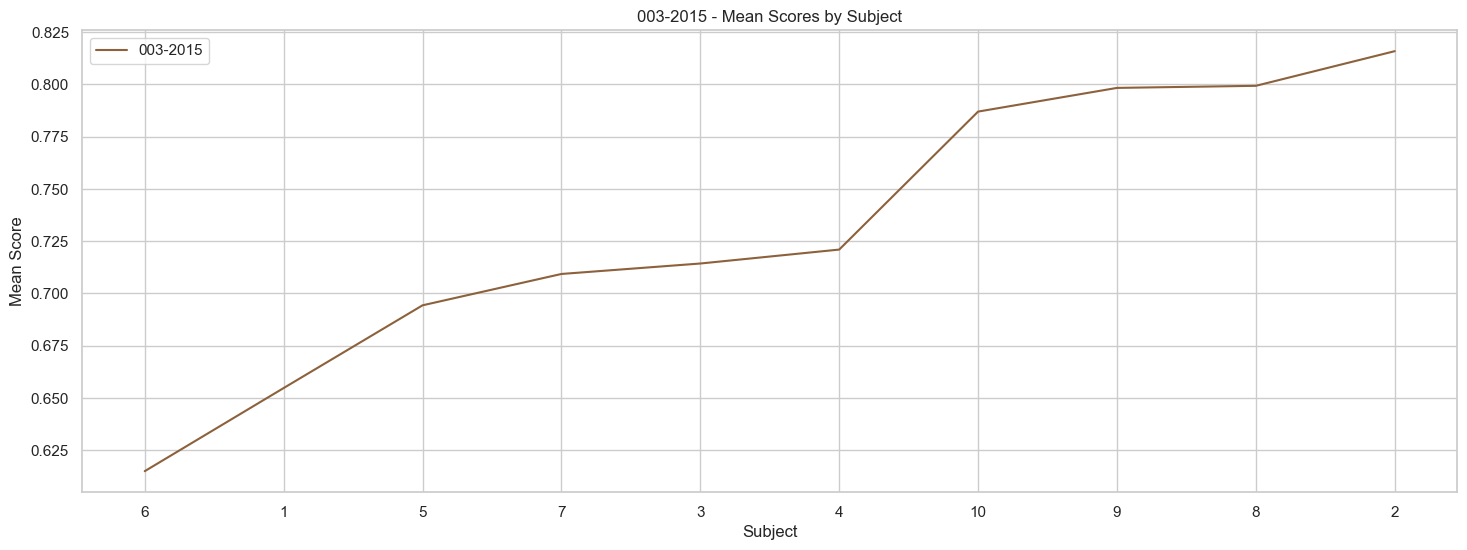

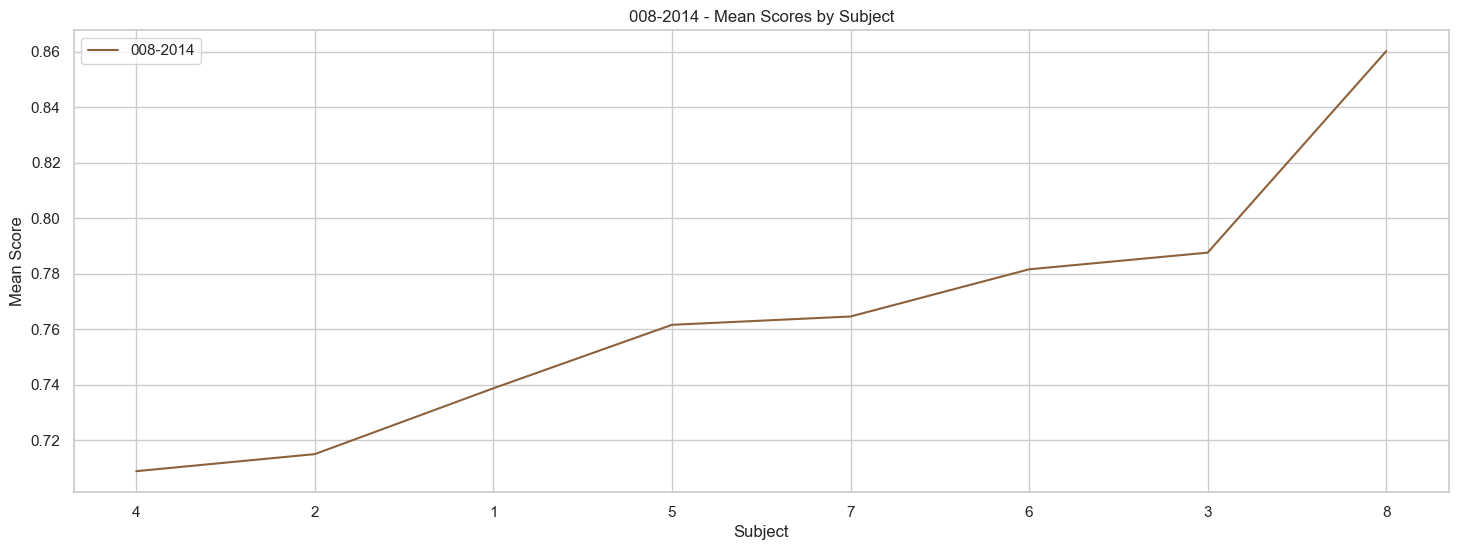

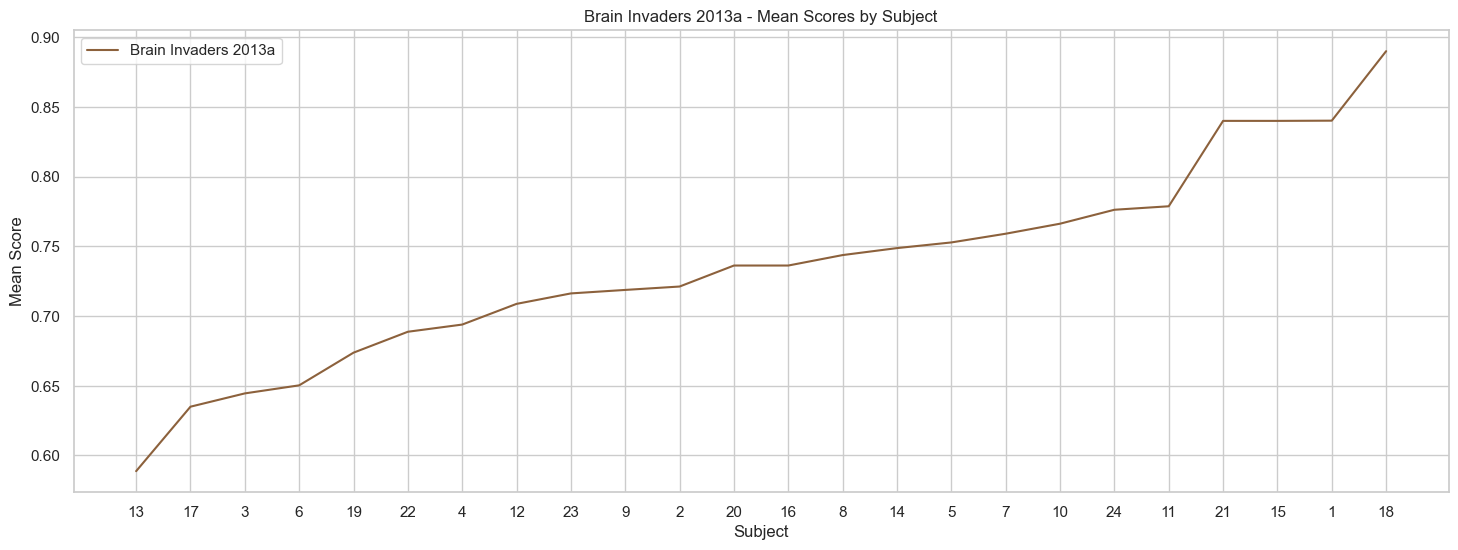

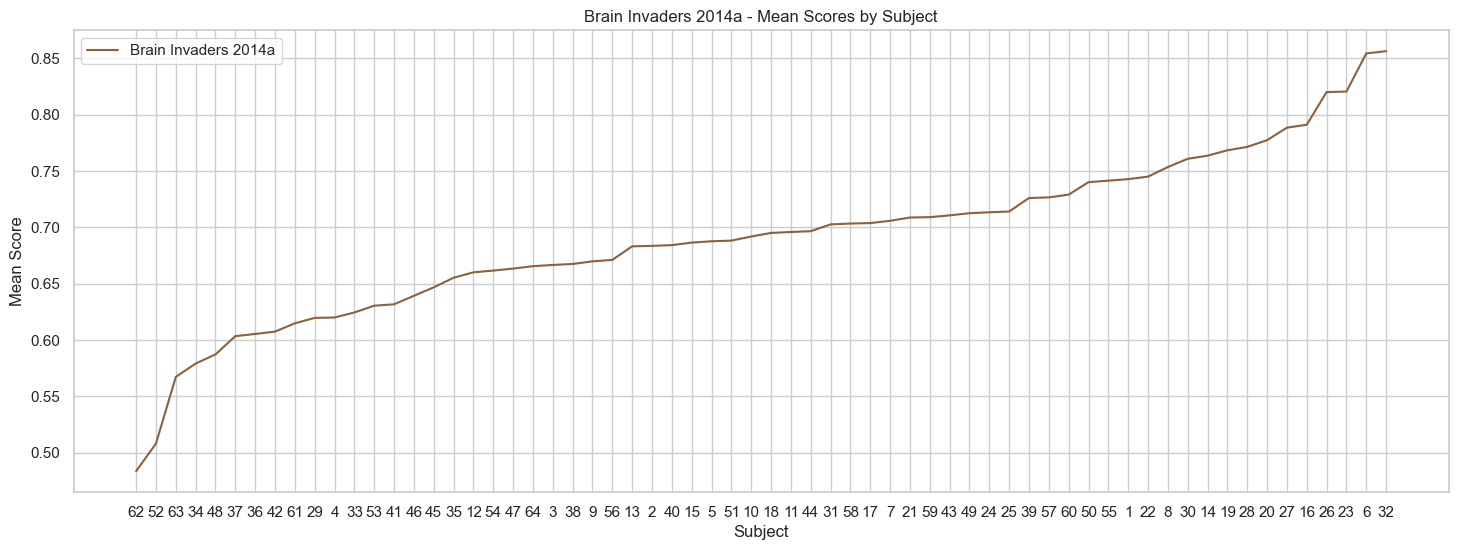

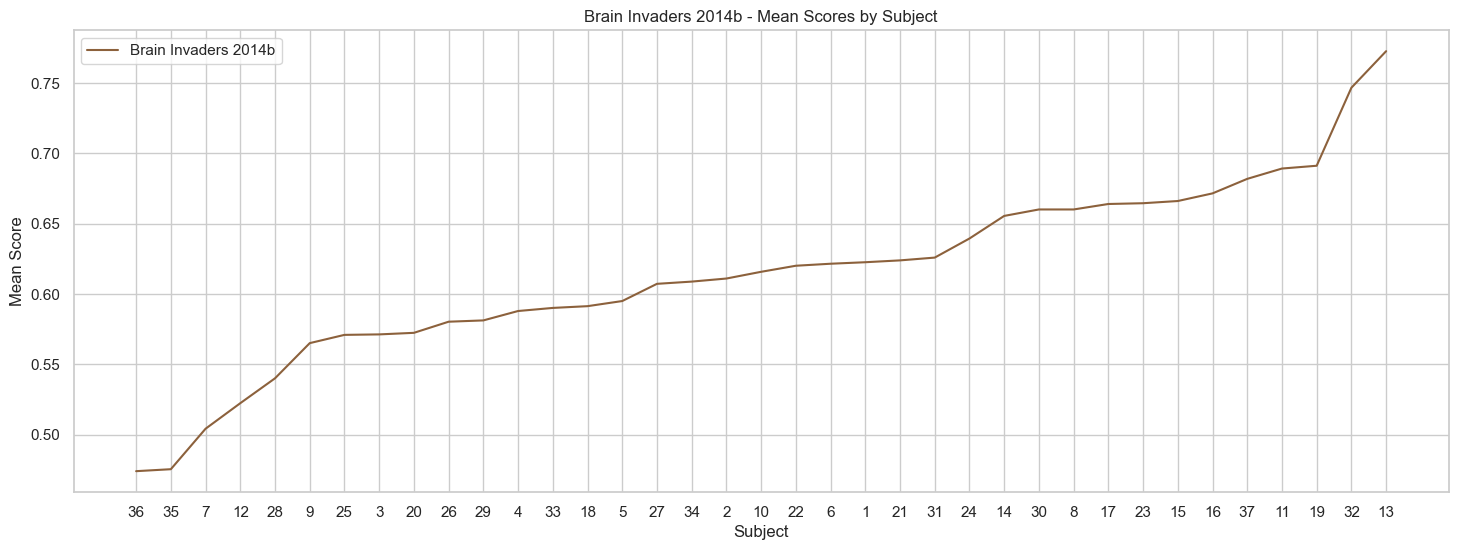

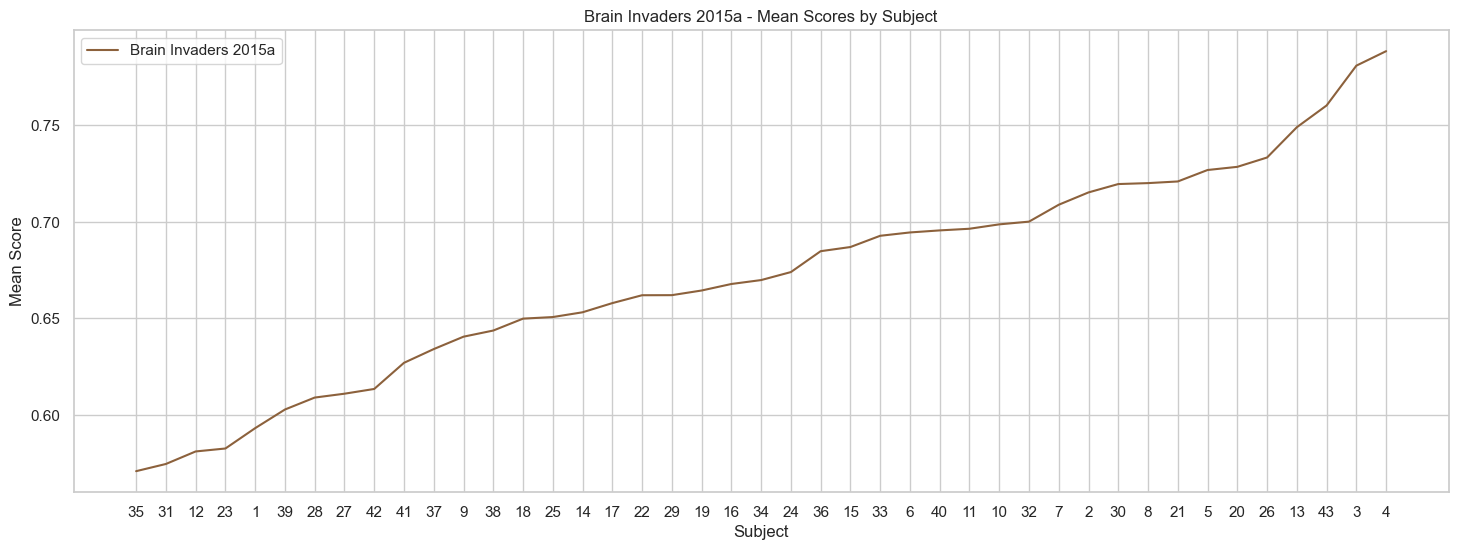

In [5]:
sns.set_style("whitegrid")
sns.set_palette("muted")
datasets = results['dataset'].unique()
colors = sns.color_palette("muted", n_colors=len(datasets))

for dataset in datasets:
    fig, ax = plt.subplots(figsize=(10,6))
    mean_scores_by_subject = results[results['dataset'] == dataset].groupby('subject')['score'].mean()
    mean_scores_by_subject_sorted = mean_scores_by_subject.sort_values()
    ax.plot(mean_scores_by_subject_sorted.index, mean_scores_by_subject_sorted.values, color=colors[i], label=dataset)
    ax.set_xlabel('Subject')
    ax.set_ylabel('Mean Score')
    ax.set_title(f'{dataset} - Mean Scores by Subject')
    ax.legend()
    plt.subplots_adjust(right=1.5)
    plt.show()
    